# 869 Assignment 1 

TODO: Fill in the information below:

- [First name, Last name]
- [Student number]
- [Question Number, Task Number]
- [Program]
- [Cohort]
- [Course Number]
- [Date]

In [1]:
# Do not change this cell

import datetime
print(datetime.datetime.now())

2020-11-21 19:13:09.947880


In [3]:
# Do not change this cell

import pandas as pd
import numpy as np
import sklearn

print('scikit-learn: {}'.format(sklearn.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

scikit-learn: 0.23.1
pandas: 1.0.5
numpy: 1.18.5


In [104]:
# Do not change this cell

import os
os.getcwd()

'C:\\Users\\jnarain\\Documents\\New folder\\MMAI\\869 - Machine Learning and AI Technology\\Individual Assignment'

In [105]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yellowbrick

In [106]:
# TODO: Import other packages as necessary
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture



import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes

import itertools




from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ModuleNotFoundError: No module named 'kmodes'

In [6]:
# Read in the data
df = pd.read_csv("jewelry_customers.csv") # or whatever file you need

In [12]:
# TODO: continue here to perform the given task. 
# Don't forget to document your code!
# Use as many cells as you'd like!
# Don't print out large volumes of output!
# Don't forget to save/export as PDF!
# Make sure to always run all cells in order! Always restart kernel and run all cells before creating the PDF

# Data Exploration

In [16]:
df.info()
print('\n')
df.head()
print('\n')
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB




,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [22]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [29]:
#import sys
#!{sys.executable} -m pip install pandas_profiling

In [33]:
import pandas_profiling

In [35]:
pandas_profiling.ProfileReport(df)

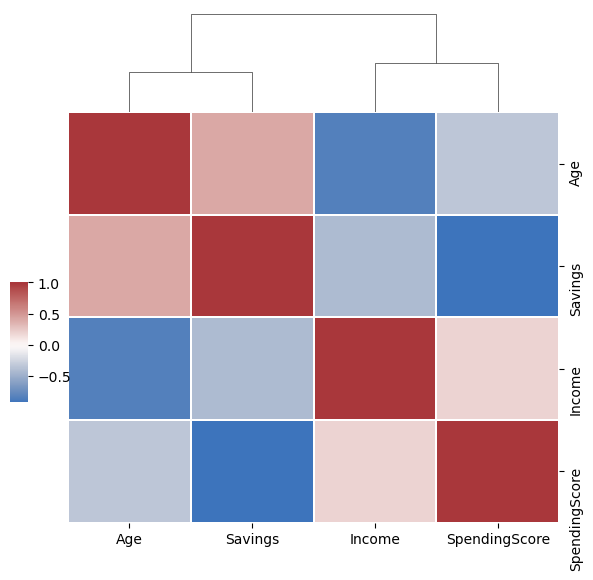

In [45]:
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(6,6))

g.ax_row_dendrogram.remove()

In [46]:
df.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

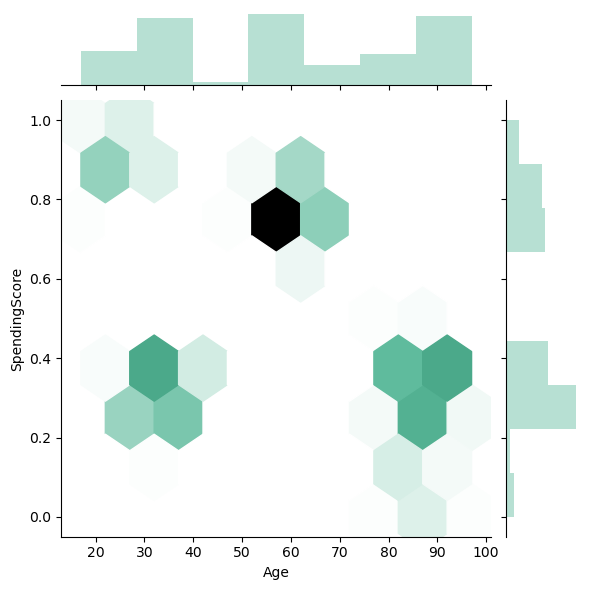

In [49]:
spend = df['SpendingScore']
age = df['Age']
sns.jointplot(x=age, y=spend, kind="hex", color="#4CB391")

# Normalize the Data

In [56]:
X = df.copy()
#X = X.drop(['CustomerID', 'Age', 'Male'], axis=1)
X.head(10)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


In [57]:
df.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

In [60]:
scaler = StandardScaler()
features = ['Age', 'Income', 'SpendingScore', 'Savings']
X[features] = scaler.fit_transform(X[features])
#X = scaler.fit_transform(X)

In [65]:
X.shape
X.info()
X.head()
X.tail()

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


,Age,Income,SpendingScore,Savings
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452
504,1.243160,-1.258335,-0.831890,0.510463


In [67]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-1.954432e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-4.058360e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


# Plot the Data

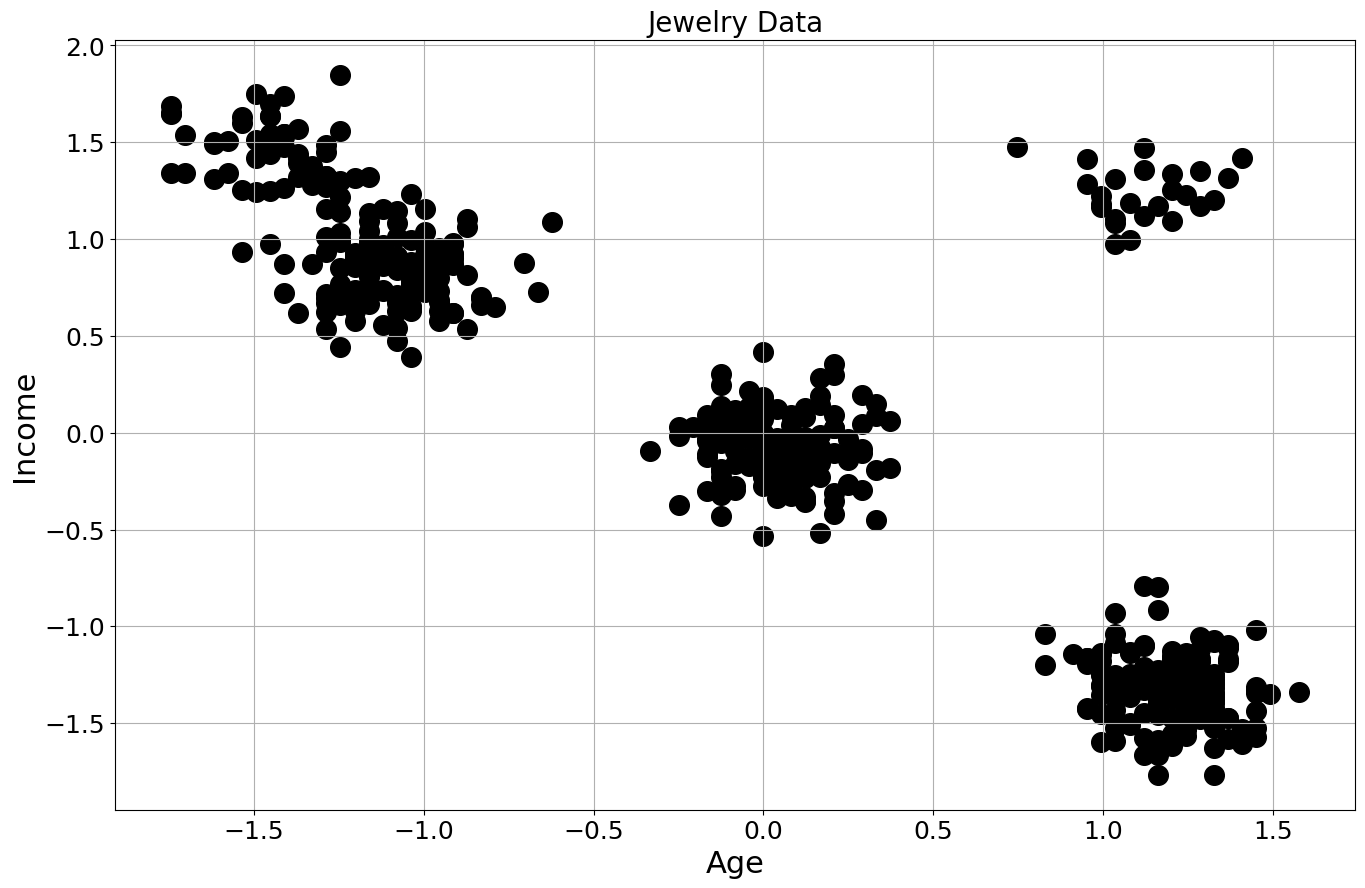

In [89]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c="black", s=200);
plt.title("Jewelry Data", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.savefig('Jewel1.png');

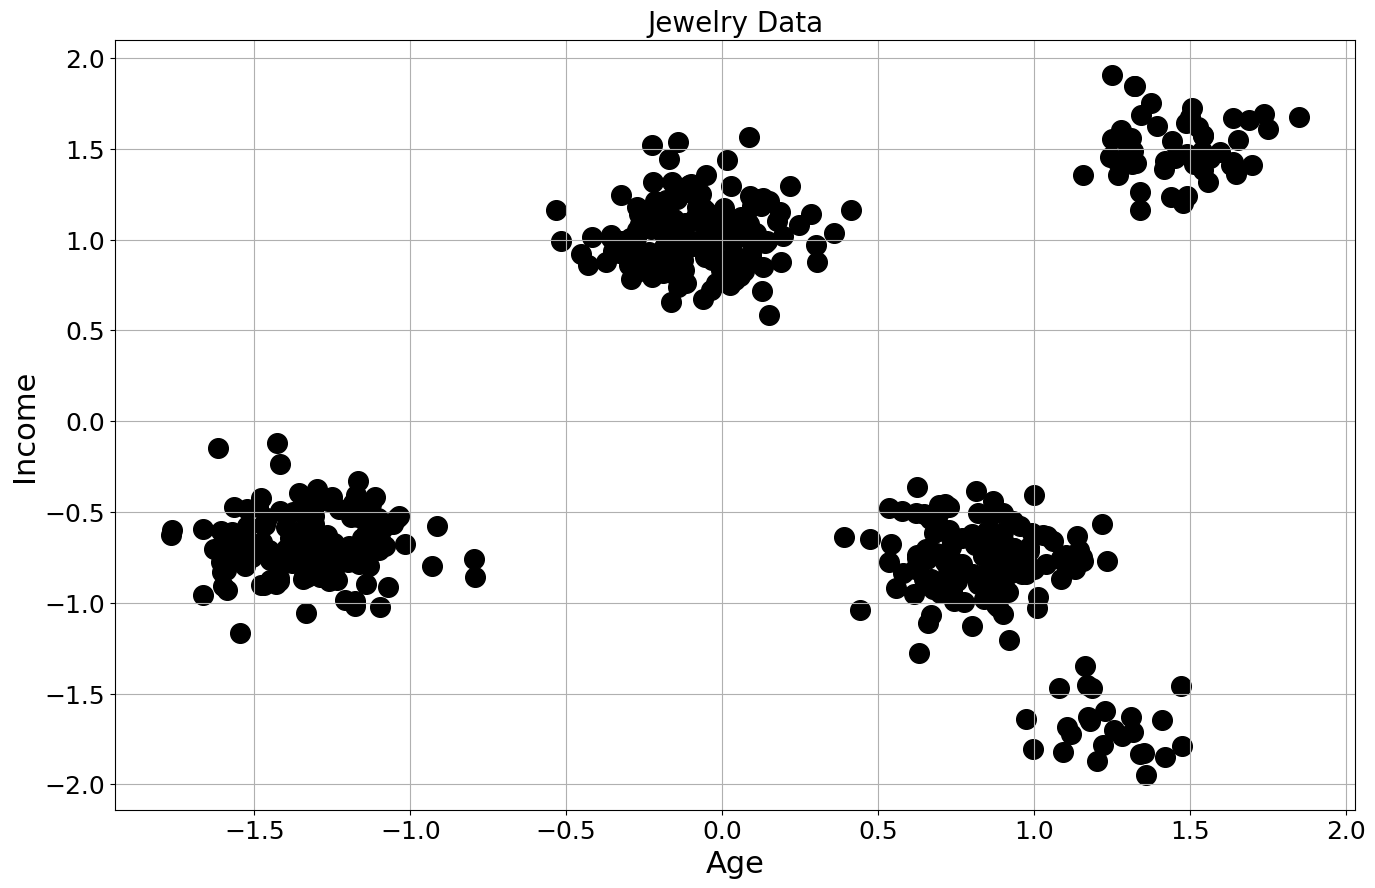

In [91]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c="black", s=200);
plt.title("Jewelry Data", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.savefig('Jewel2.png');

# K-Means

In [78]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [79]:
k_means.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [75]:
# Let's look at the centers
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

# Plot the Clusters

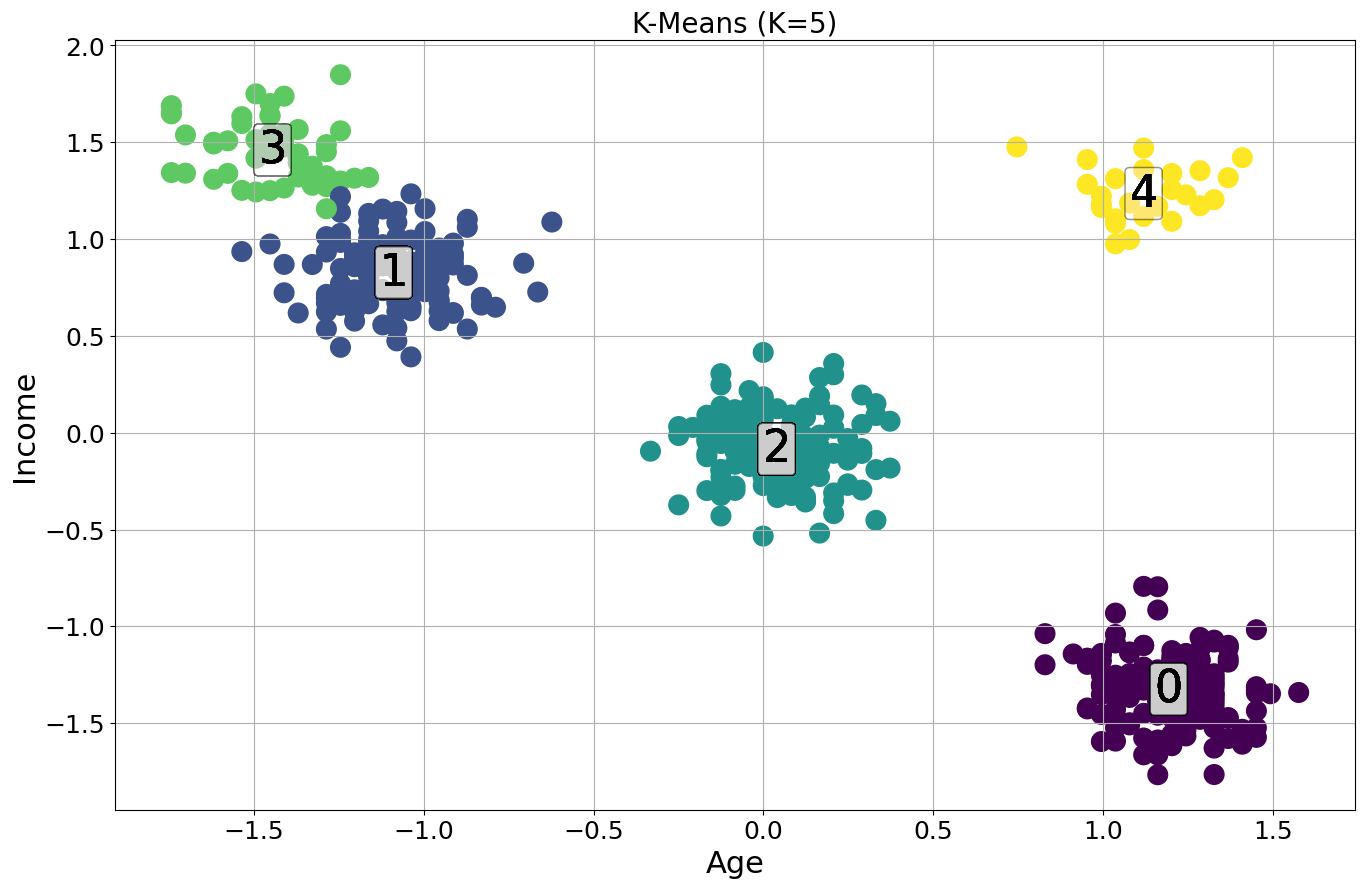

In [92]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=200, c=k_means.labels_);
#plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));

plt.savefig('Jewel-kmeans-5.png');

# Internal Validation Metrics

In [93]:
# WCSS == Inertia
k_means.inertia_

66.51111374859076

In [94]:
silhouette_score(X, k_means.labels_)

0.8048976287755765

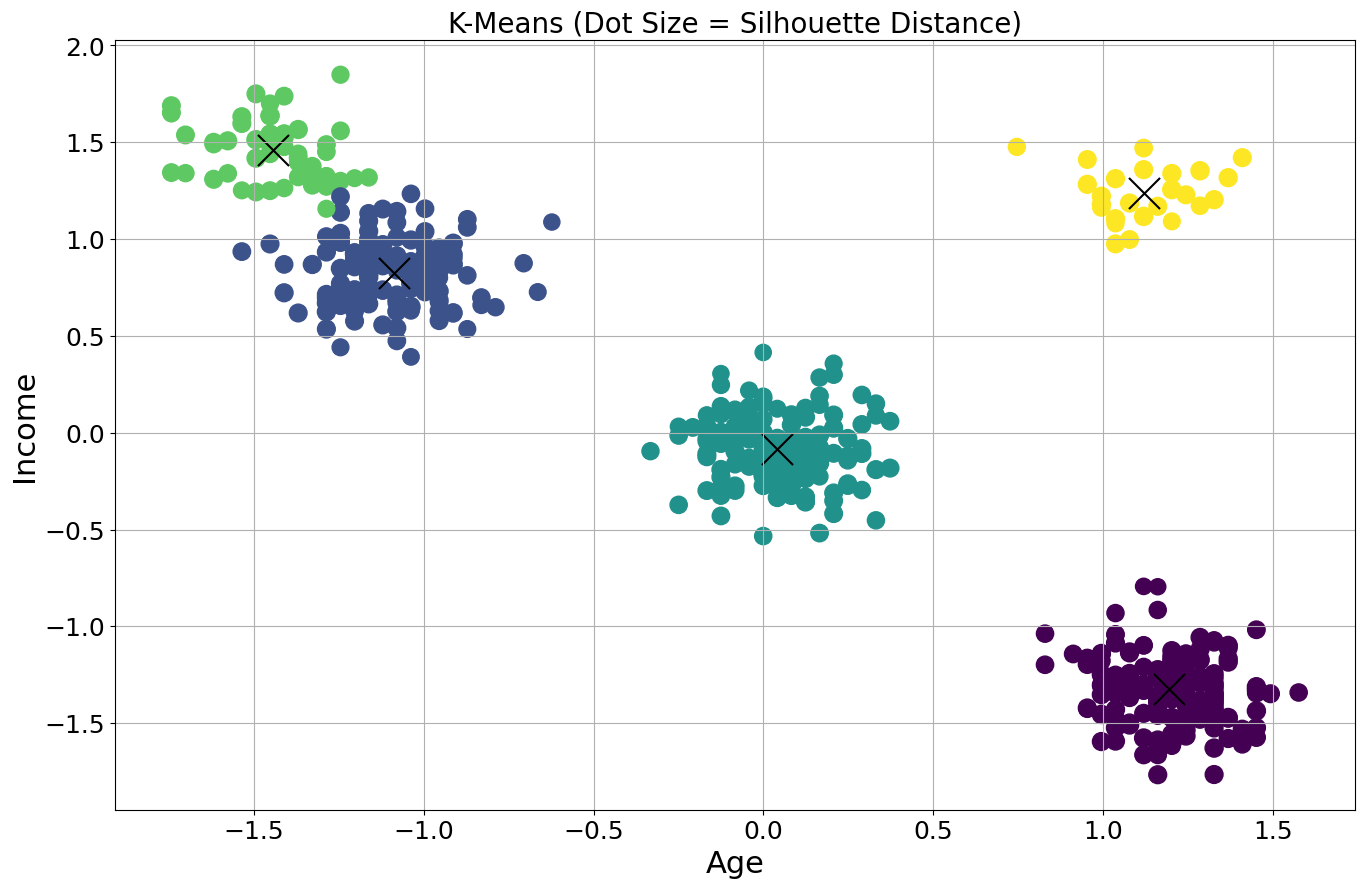

In [97]:
plt.style.use('default');

sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 200*sample_silhouette_values

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

plt.savefig('Jewel1-kmeans-5-silhouette-size.png');

In [98]:
#sklearn.metrics.davies_bouldin_score(X, k_means.labels_)

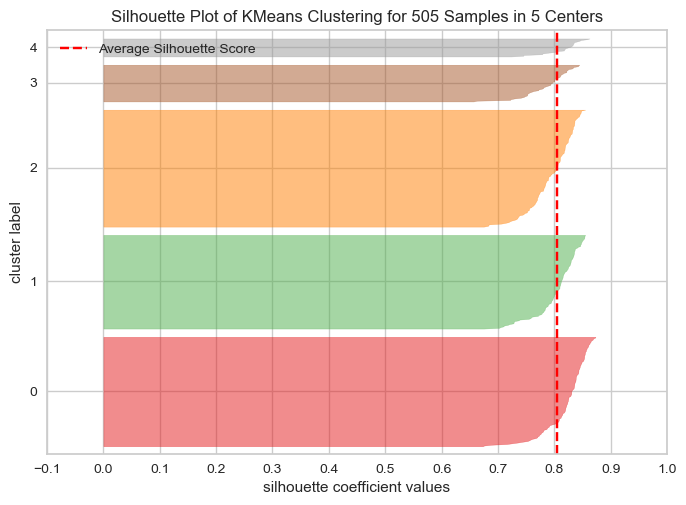

In [107]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('Jewel3-kmeans-5-silhouette.png', transparent=False);

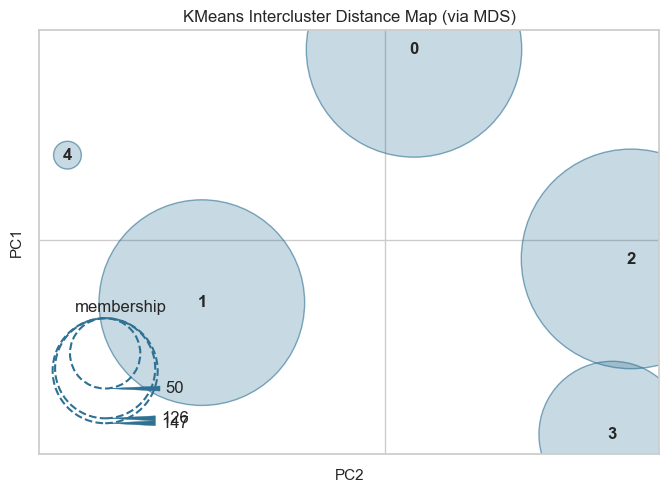

<Figure size 800x550 with 0 Axes>

In [108]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(k_means)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data
plt.savefig('Jewel4-kmeans-5-tsne.png', transparent=False);

# Elbow Method

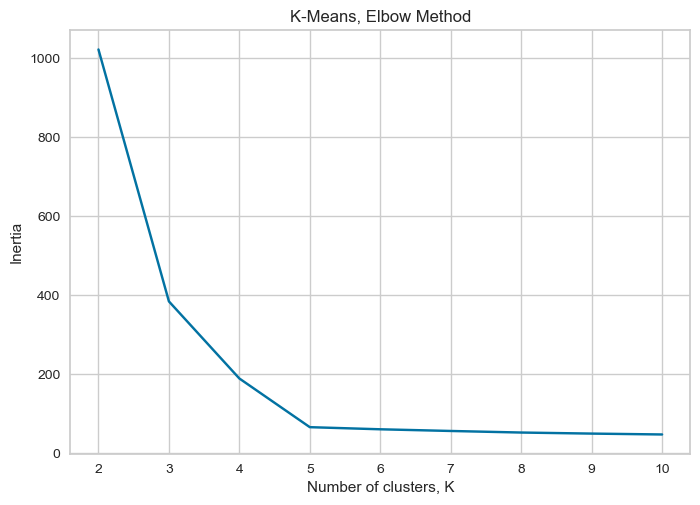

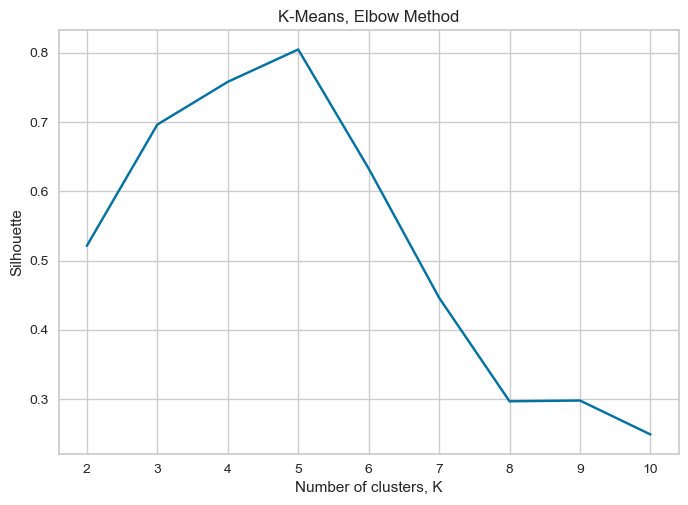

In [113]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig('Jewel5-elbow-interia.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig('Jewel6-kmeans-elbow-silhouette.png');

# Intepretting the Clusters

## Means

In [117]:
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [119]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(5)
    


Cluster 0:


,Age,Income,SpendingScore,Savings
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452
504,1.243160,-1.258335,-0.831890,0.510463
mean,1.192385,-1.325106,-0.679638,0.970164



Cluster 1:


,Age,Income,SpendingScore,Savings
477,-1.078938,0.878451,-0.627070,0.613434
482,-1.120404,0.915078,-0.839366,0.977675
498,-1.203336,0.626207,-0.362296,0.900909
500,-1.286268,0.714535,-0.453557,0.621787
mean,-1.088152,0.827441,-0.752406,0.627046



Cluster 2:


,Age,Income,SpendingScore,Savings
480,0.247975,-0.119150,1.090334,-0.574015
491,-0.042287,-0.143067,1.539992,-0.890089
492,0.082111,-0.034243,0.721552,-0.925445
495,0.289441,0.042793,0.779483,-1.125742
mean,0.038796,-0.085246,1.027216,-1.005695



Cluster 3:


,Age,Income,SpendingScore,Savings
466,-1.700928,1.340611,1.162288,-1.505162
487,-1.369200,1.320782,1.848446,-1.515115
496,-1.535064,1.597305,1.483239,-1.824853
499,-1.410666,1.477079,1.201559,-1.405315
mean,-1.444668,1.460507,1.510580,-1.572496



Cluster 4:


,Age,Income,SpendingScore,Savings
383,1.160228,1.169463,-1.452726,0.432373
414,1.201694,1.338748,-1.835384,0.332122
427,1.118762,1.358799,-1.947295,0.710311
455,1.409024,1.420790,-1.850254,0.456077
mean,1.118762,1.235654,-1.683670,0.595881
